# Notebook to Visualise the Data Augmentation process

### Imports

In [17]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.transforms import v2 as transforms
import math
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

### Setup the Datasets and DataLoaders

In [18]:
# Define the transformations
transformations1 = transforms.Compose(
    [transforms.ToTensor(), transforms.Resize((250, 250))])

# Load the dataset
training_dataset = torchvision.datasets.Flowers102(root='./data', split="train",
                                                   download=True, transform=transformations1)
testing_dataset = torchvision.datasets.Flowers102(root='./data', split="test",
                                                  download=True, transform=transformations1)
validation_dataset = torchvision.datasets.Flowers102(root='./data', split="val",
                                                     download=True, transform=transformations1)

# Create the dataloaders
train_loader = DataLoader(training_dataset, batch_size=12, shuffle=True)
test_loader = DataLoader(testing_dataset, batch_size=64, shuffle=False)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)

### Setup the Show Images function

In [19]:
# Function to display images
def show_images(images, title):
    grid = make_grid(images, nrow=5, padding=10)
    np_grid = grid.numpy().transpose((1, 2, 0))
    plt.figure(figsize=(15, 5))
    plt.imshow(np_grid)
    plt.title(title)
    plt.axis('off')
    plt.show()

### Iterate over the train_loader and display the images

In [20]:
dataiter = iter(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].


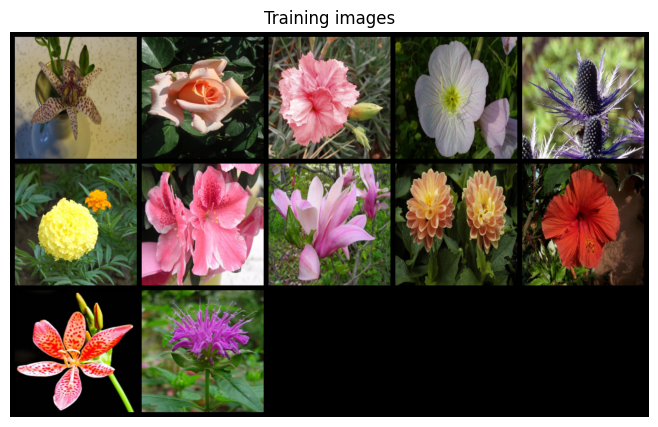

In [21]:
images, labels = dataiter.__next__()

show_images(images, title='Training images')



### Define the new transformations

In [22]:
transform_list = [
    transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomResizedCrop((250, 250), scale=(0.5, 1.0)),  # Randomly crop to a smaller size and resize back
        transforms.RandomRotation(55),
        transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.2),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.GaussianBlur(kernel_size=5),
        transforms.ToTensor(),
    ]),
]


### Visualise the same images after the transformation

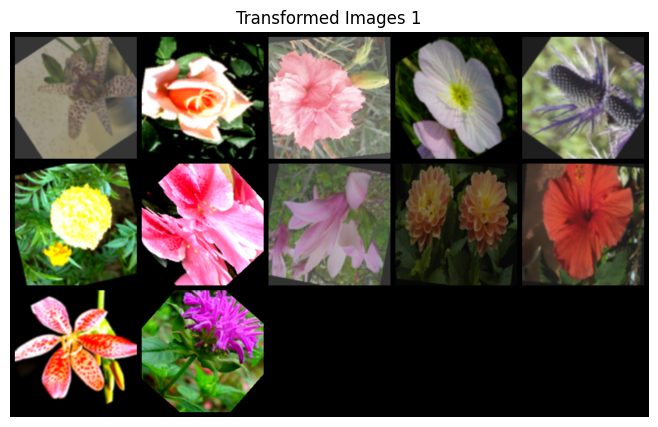

In [23]:
# Apply transformations and visualize
for i, transform in enumerate(transform_list):
    transformed_images = []
    for img in images:
        img_trans = transform(img)
        transformed_images.append(img_trans)
    show_images(transformed_images, title=f"Transformed Images {i+1}")